# Pump It Up: Data mining the water table 

 From: Taarifa and the Tanzanian Ministry of Water https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/
 Access to water affects communities not only in health aspect but also to their income and overall growth. Many African countries have many areas with no reliable access to water. Many households have to often spend several hours to get water from pump. Facing problems while availing water is not only because of scarcity of water, but also because of failed water transportation system from source to the end-user. The aim of this 'data-for-social good' project is to predict which water pumps in Tanzania  are functional based on a given set of characteristics. This would help the	Tanzanian	Ministry of Water in improving	the operational efficiency of water point maintenance and	make	sure	that	clean, potable water	is	available	to	communities across	Tanzania.
 
A training dataset with information of nearly sixty thousand water points across Tanzania is provided and it is expected to build a model which will be able to predict which water points are functional, nonfunctional and functional but need repair on a test dataset. 
 


### Objective: To predict one of three classes of the water pumps 
###### 1. functional, 2. not functional, 3. functional needs repair

![alt text](pumping.jpg "Pump image courtesy of Flickr user Christopher Jensen")

Data provide the following set of information about the waterpoints: <br>
<pre>

amount_tsh - Total static head (amount water available to waterpoint)
date_recorded - The date the row was entered
funder - Who funded the well
gps_height - Altitude of the well
installer - Organization that installed the well
longitude - GPS coordinate
latitude - GPS coordinate
wpt_name - Name of the waterpoint if there is one
num_private -
basin - Geographic water basin
subvillage - Geographic location
region - Geographic location
region_code - Geographic location (coded)
district_code - Geographic location (coded)
lga - Geographic location
ward - Geographic location
population - Population around the well
public_meeting - True/False
recorded_by - Group entering this row of data
scheme_management - Who operates the waterpoint
scheme_name - Who operates the waterpoint
permit - If the waterpoint is permitted
construction_year - Year the waterpoint was constructed
extraction_type - The kind of extraction the waterpoint uses
extraction_type_group - The kind of extraction the waterpoint uses
extraction_type_class - The kind of extraction the waterpoint uses
management - How the waterpoint is managed
management_group - How the waterpoint is managed
payment - What the water costs
payment_type - What the water costs
water_quality - The quality of the water
quality_group - The quality of the water
quantity - The quantity of water
quantity_group - The quantity of water
source - The source of the water
source_type - The source of the water
source_class - The source of the water
waterpoint_type - The kind of waterpoint
waterpoint_type_group - The kind of waterpoint
</pre>
Classification Rate =$ \frac{1}{N}\sum_{i=0}^{N}I(y_i=\hat{y_i} )$ <br>

The metric used for this competition is the classification rate, which calculates the percentage of rows where the predicted class ŷ  in the submission matches the actual class, y in the test set. The maximum is 1 and the minimum is 0. The goal is to maximize the classification rate.

## Hypothesis:
#### The functional status of the water pump depends on management and location.

Explanation: The functional status of the water pump depends on management which includes information regarding funder, maintenance people, water point’s exact information, while other pertaining to location of water point such as region, sub-village, geographical co-ordinates and population.

## Executive Summary:
■ Overall, I have shown in this notebook, prediction of the functional status of water pumps
■ Most important driver of the model is the elevation of the geographic location

→ Many interesting facts were discovered through EDA including 
* Dataset have few Numerical(7)  and  mostly Categorical(31) Features
* Most of the missing values are represented as zero value
* Classes are imbalanced(minority class is 7%)
* Most of the water points with dry water level/quantity has GROUNDWATER as water source. GROUNDWATER Depletion 



# 1. Exploratory Data Analysis (EDA)
## 1.A. Import Libraries

In [2]:
import numpy as np
import pandas as pd
#from collections import Counter

# VisualiZation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set_style("darkgrid")

## ignore warnings
#import warnings
#warnings.filterwarnings('ignore')
#from sklearn.model_selection import train_test_split

## 1.B. Load the Data

In [3]:
dtypes = {'region_code': 'object', 'district_code':'object'}


X = pd.read_csv('train_values.csv',
                      index_col = [0],dtype = dtypes,
                      parse_dates=['date_recorded'],
                      infer_datetime_format=True)

y = pd.read_csv('train_labels.csv', index_col = [0])

test_data = pd.read_csv('test_vlaues.csv', 
                     index_col = [0], dtype = dtypes,
                     parse_dates=['date_recorded'],
                     infer_datetime_format=True)

In [4]:
X.shape

(59400, 39)

### First Data Inspection

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null datetime64[ns]
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null object
district_code            59400 non-null object
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 no

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 50785 to 68707
Data columns (total 39 columns):
amount_tsh               14850 non-null float64
date_recorded            14850 non-null datetime64[ns]
funder                   13981 non-null object
gps_height               14850 non-null int64
installer                13973 non-null object
longitude                14850 non-null float64
latitude                 14850 non-null float64
wpt_name                 14850 non-null object
num_private              14850 non-null int64
basin                    14850 non-null object
subvillage               14751 non-null object
region                   14850 non-null object
region_code              14850 non-null object
district_code            14850 non-null object
lga                      14850 non-null object
ward                     14850 non-null object
population               14850 non-null int64
public_meeting           14029 non-null object
recorded_by              14850 no

In [7]:
print('train_data_size:', X.shape)
print('test_data_size:', test_data.shape)

train_data_size: (59400, 39)
test_data_size: (14850, 39)


In [8]:
X.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [9]:
# Numerical columns
num_feat = X.select_dtypes(include='number').columns.to_list()

# Categorical columns
cat_feat = X.select_dtypes(include='object').columns.to_list()
print(len(num_feat))
print(len(cat_feat))
print('NUMERICAL_FEATURES:',num_feat)
print('CATEGORICAL_FEATURES:',cat_feat)

7
31
NUMERICAL_FEATURES: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year']
CATEGORICAL_FEATURES: ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [10]:
### List the categorical features with number of Unique values 
n= []
for feat in cat_feat:
    n_unique_val = X[feat].value_counts().count()
    n.append(n_unique_val)
    l = dict(zip(cat_feat,n))
c= pd.Series(l)
unique_val_feat = c.sort_values(ascending=False)
unique_val_feat

wpt_name                 37400
subvillage               19287
scheme_name               2696
installer                 2145
ward                      2092
funder                    1897
lga                        125
region_code                 27
region                      21
district_code               20
extraction_type             18
extraction_type_group       13
scheme_management           12
management                  12
source                      10
basin                        9
water_quality                8
payment_type                 7
extraction_type_class        7
waterpoint_type              7
source_type                  7
payment                      7
quality_group                6
waterpoint_type_group        6
quantity                     5
quantity_group               5
management_group             5
source_class                 3
public_meeting               2
permit                       2
recorded_by                  1
dtype: int64

Should take care that while encoding categorical features features like wpt_name,subvillage, scheme_name, installer        ward, funder and lga  with high number of unique values will indulge in computationally expensive model.                    

### Missing Values

In [11]:
##List of Features with percentage of missing values. 
mydata = [X, test_data]
for i in range(0,len(mydata)): 
    missing_values = mydata[i].isnull().sum().sort_values(ascending = False)
    percentage_missing_values= mydata[i].isnull().sum().sort_values(ascending = False)*100/mydata[i].shape[0]
    miss_vals = pd.concat([missing_values, percentage_missing_values], axis = 1, keys = [
    'missing_values', 'percentage_missing_values'])
    if i == 0:
        miss_vals_train = miss_vals
    else:
        miss_vals_test = miss_vals

        
## Identifying Features with missing values
ds_train = miss_vals_train[miss_vals_train['percentage_missing_values'] > 0]['percentage_missing_values']
ds_test = miss_vals_test[miss_vals_test['percentage_missing_values'] > 0]['percentage_missing_values']

ds_train

scheme_name          47.417508
scheme_management     6.526936
installer             6.153199
funder                6.119529
public_meeting        5.612795
permit                5.144781
subvillage            0.624579
Name: percentage_missing_values, dtype: float64

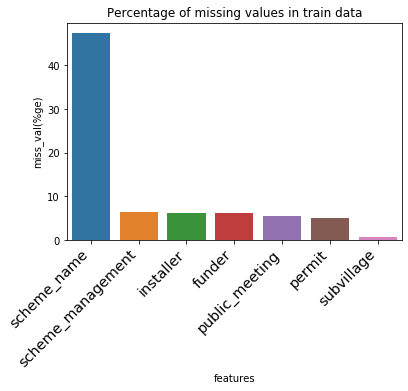

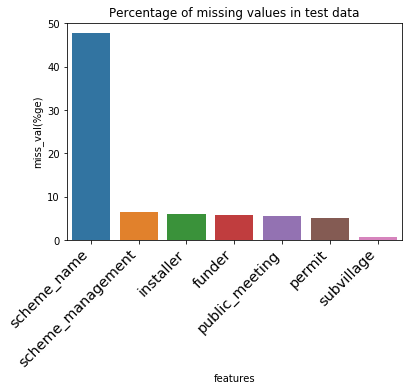

In [12]:
##Plotting the train and test missing values
fig1 = sns.barplot(x=ds_train.index, y=ds_train.values, data=miss_vals_train)
fig1.set(xlabel='features', ylabel='miss_val(%ge)',title = "Percentage of missing values in train data")
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.show(fig1)

fig2 = sns.barplot(x=ds_test.index, y=ds_test.values, data=miss_vals_test)
fig2.set(xlabel='features', ylabel='miss_val(%ge)',title = "Percentage of missing values in test data")
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.show(fig2)

All the features with missing values are categorical features.

## 2.A. Exploring Target Variable

### Target Distribution

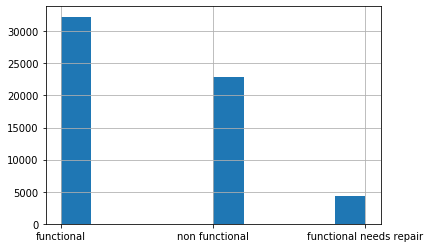

In [13]:
y['status_group'].hist()

There is clearly a problem of unbalanced classes that might affect some kind of models, especially linear regression ones; ensemble models are less susceptible to unbalanced issues. 

### Spatial Distribution of the Target

In [14]:
dflnlat = pd.concat([X[['longitude', 'latitude']], y['status_group']], axis=1)

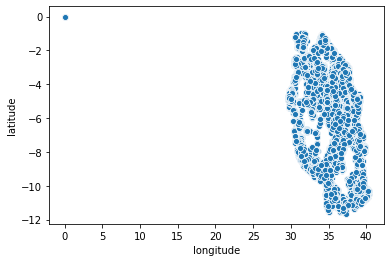

In [15]:
sns.scatterplot(x= dflnlat.longitude, y= dflnlat.latitude)

The plot shows outlier where the lat lon value have zero value. Let us see how many records have zero lat or lon value

In [16]:
X[dflnlat.longitude == 0]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,...,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump
32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,...,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
33500,0.0,2011-07-18,Hesawa,0,DWE,0.0,-2.000000e-08,Bombani,0,Lake Victoria,...,never pay,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,hand pump,hand pump
71487,0.0,2012-10-25,Ridep,0,DWE,0.0,-2.000000e-08,Nyanguruma,0,Lake Victoria,...,on failure,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
70379,0.0,2011-07-18,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Nersing College,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
59713,0.0,2011-07-30,Plan International,0,Plan Internationa,0.0,-2.000000e-08,Petro,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump


In [17]:
dflnlat[dflnlat.latitude == 0]

,longitude,latitude,status_group
id,,,


**Shinyanga, Tanzania** <br>
Latitude and longitude coordinates are: -3.680996, 33.427139. <br>
**Mwanza, Tanzania** <br>
Mwanza is located at latitude -2.51667 and longitude 32.9000015 <br>
Looking at the graph above we can clearly see the point in the top left corner that must be fixed. Tanzania is all below the equator. The graph looks like Tanzania, doesn't it? In fact it is Tanzania! Remember the description?<br>
<blockquote>The data for this comeptition comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water.</blockquote>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Tanzania_regions_ita.svg/1280px-Tanzania_regions_ita.svg.png' alt="Drawing" style="width: 400px;"><br>
We can say that zero is a wrong value to fix, but how? Using SimpleImputer does not seem to make much sense. replacing missing values (zeros) with mean or median won't help that much. We should use some kind of "advanced" imputer that tries to guess the right value looking at similar points in the dataset. Let's try with KNNImputer (IterativeImputer is still experimental so we won't use it).

TO see if there is any spatial trend to the status of the pump we will drop the zero longitutde record in the map.


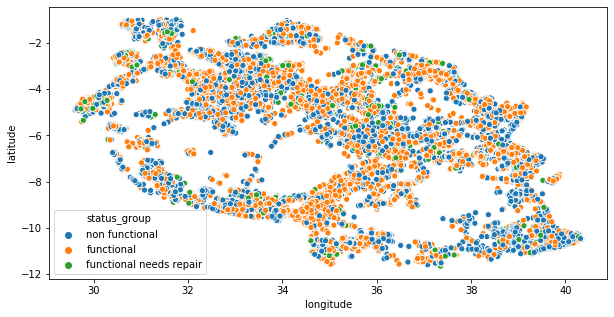

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= dflnlat[dflnlat.longitude != 0]['longitude'], y= dflnlat.latitude,hue=dflnlat.status_group)

There is no clear cut relationship between the pump functionality and its location. The distribution of all the three
labels is quite uniform in the area

I suspect that other numerical features too have zero values represnting the missing values.
Let us check

In [19]:
X.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,30500.000000,2013.000000


### Zero Values representing the missing values in data

In [20]:
### NUmerical Features with zero values MISSING VALUES
n_zero_vals = []
perc_zero_vals = []
feat = 'latitude'
for feat in num_feat:
    X_1 = X[X[feat] == 0]
    v2 = list(X_1[feat].value_counts().values)
    if len(v2)== 0:
        v2.append(0)
    n_zero_vals.append(v2[0])
    perc = (v2[0]/X.shape[0]*100)
    perc_zero_vals.append(perc)

perc_zero_vals =[round(x,1) for x in perc_zero_vals]
df = pd.DataFrame(list(zip(num_feat, n_zero_vals, perc_zero_vals)), 
                  columns =['Features', 'No. of zero vals', '%ge of zero vals'])
df

,Features,No. of zero vals,%ge of zero vals
0,amount_tsh,41639,70.1
1,gps_height,20438,34.4
2,longitude,1812,3.1
3,latitude,0,0.0
4,num_private,58643,98.7
5,population,21381,36.0
6,construction_year,20709,34.9


## Looking into the kind of relation the features have with the target

### Water Quality Group and functionality of Pumps

In [21]:
X['quality_group'].unique()

array(['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'],
      dtype=object)

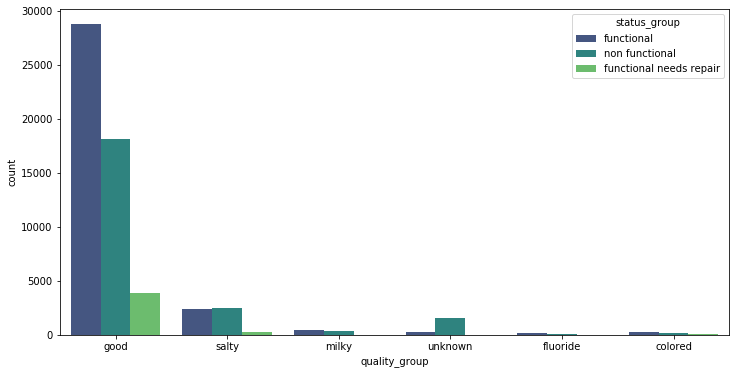

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x=X.quality_group, hue =y.status_group, palette='viridis')

### Source wise Target Distribution

In [23]:
X['source_class'].unique()

array(['groundwater', 'surface', 'unknown'], dtype=object)

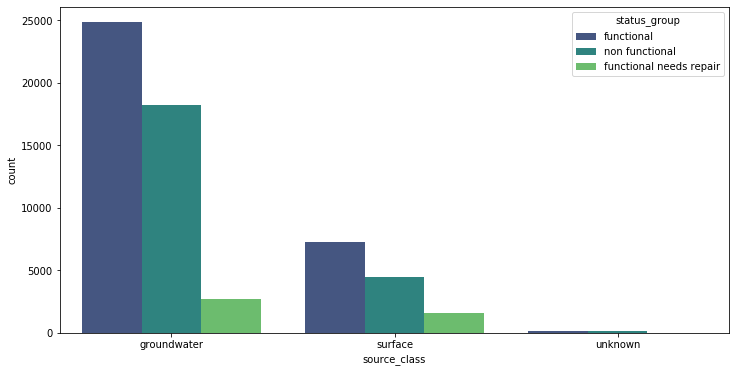

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x=X.source_class, hue =y.status_group,palette='viridis')

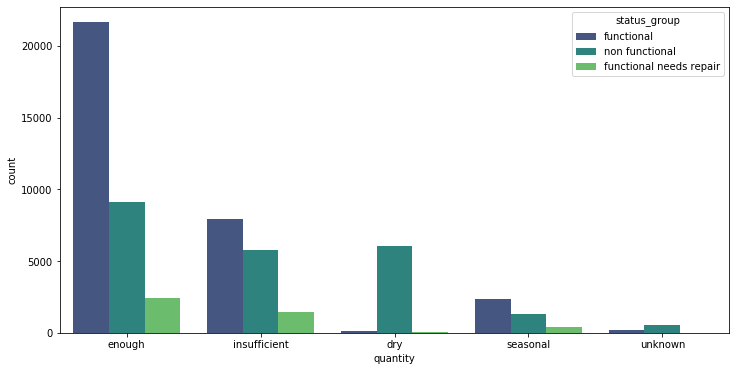

In [25]:
dfqty = pd.concat([X['quantity'], y['status_group']], axis=1)
plt.figure(figsize=(12,6))
sns.countplot(x='quantity', hue ='status_group', data=dfqty, palette='viridis');

In [26]:
y.status_group.unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [27]:
## Slice of datasets for non functional water pumps
Xnew_rep = X[y.status_group == 'functional needs repair']

## Slice of datasets for need repair water pumps
Xnew_nf =  X[y.status_group == 'non functional']

###  Distribution pumps which need repair and the water level

Text(0.5, 0, 'Quantity')

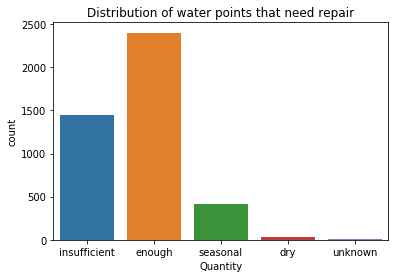

In [28]:

sns.countplot(x=Xnew_rep['quantity']);
plt.title('Distribution of water points that need repair')
# Set x-axis label
plt.xlabel('Quantity')


## Distribution of Non Functional Water pumps and water level

Text(0.5, 0, 'Quantity')

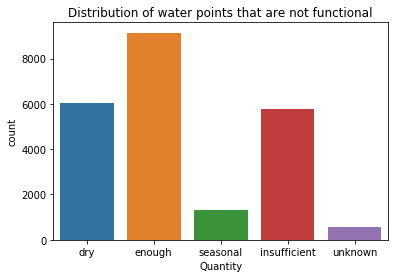

In [29]:

sns.countplot(x=Xnew_nf['quantity']);

plt.title('Distribution of water points that are not functional')
# Set x-axis label
plt.xlabel('Quantity')

## INTERESTING OBS

### CONSERVE WATER!!!!!!!!!!!!

Majority of the pumps which are non functional or needs repair and shows water level as DRY have the ground water as its source

In [30]:
Xn = Xnew_nf[Xnew_nf.quantity == 'dry']


Text(0.5, 0, 'Quantity')

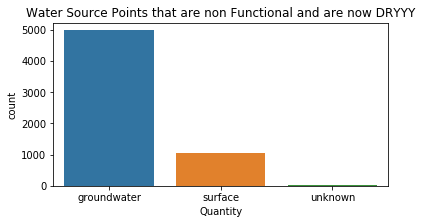

In [31]:
plt.figure(figsize=(6,3))
sns.countplot(x=Xn['source_class']);
plt.title('Water Source Points that are non Functional and are now DRYYY')
# Set x-axis label
plt.xlabel('Quantity')

Text(0.5, 0, 'source_class')

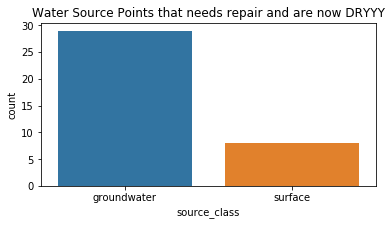

In [32]:
Xn1 = Xnew_rep[Xnew_rep.quantity == 'dry']
plt.figure(figsize=(6,3))
sns.countplot(x=Xn1['source_class']);
plt.title('Water Source Points that needs repair and are now DRYYY')
# Set x-axis label
plt.xlabel('source_class')

## Target vs construction year and gps height

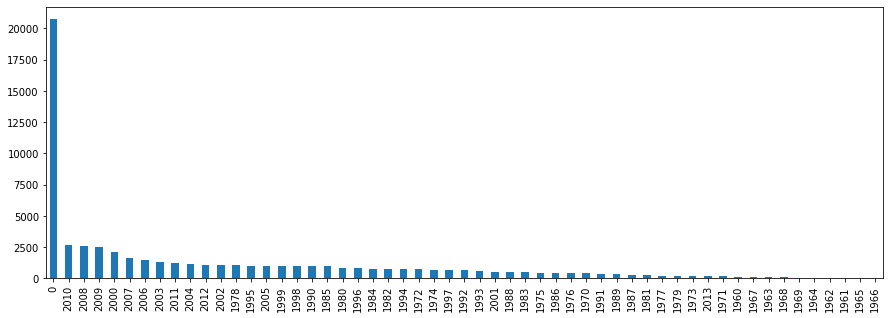

In [33]:
X.construction_year.value_counts().plot.bar(figsize=(15,5));

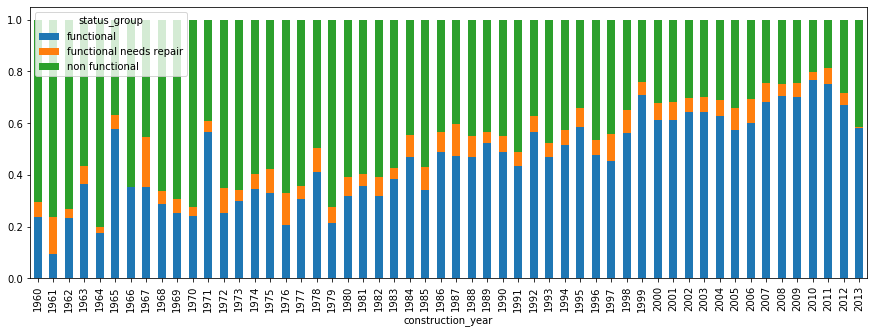

In [34]:
pd.crosstab(X.construction_year[X.construction_year != 0],
            y.status_group, normalize="index").plot.bar(stacked=True, figsize=(15,5));

Text(0.5, 1.0, 'water points installation date vs no. of water points that need repair')

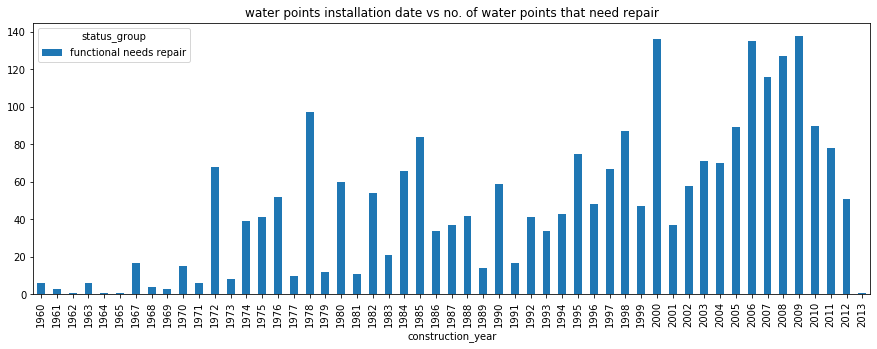

In [35]:
pd.crosstab(X.construction_year[X.construction_year != 0],
            y.status_group[y.status_group =='functional needs repair']).plot.bar(stacked=True, figsize=(15,5));
plt.title('water points installation date vs no. of water points that need repair')

### Region wise Distribution of Target

In [36]:
### Region wise three water point classes 
dfs = pd.concat([X, y['status_group']], axis=1)
grouped = dfs.groupby(['region', 'status_group'], as_index=True)
dfs_grp1 = pd.DataFrame(grouped['status_group'].count().rename("func_count"))
dfs_grp = dfs_grp1.reset_index()

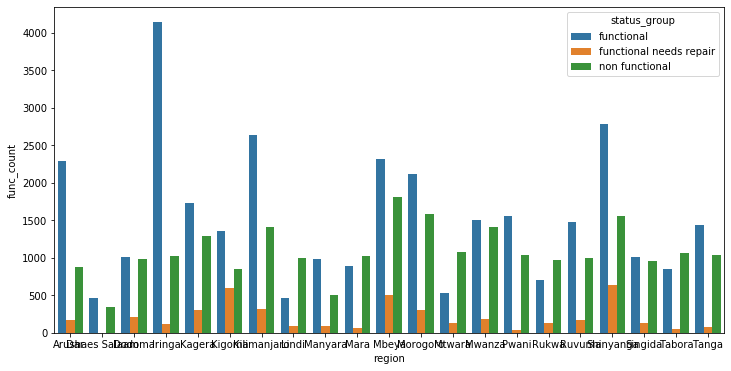

In [37]:

plt.figure(figsize=(12,6))
sns.barplot(x= dfs_grp.region, y= dfs_grp.func_count,hue=dfs_grp.status_group)


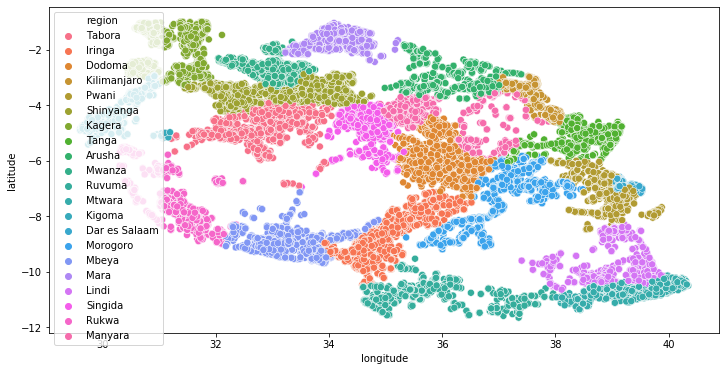

In [38]:
### Region Plot
plt.figure(figsize=(12,6))
sns.scatterplot(x= X[X.longitude != 0]['longitude'], y= X.latitude,hue=X.region, 
               s=50 ,linewidth=.5, edgecolor="white")

In [39]:
### Region wise Total Population

X_valid = X[X.population != 0] ### Remove observation where population data is missing
X_valid.shape

df_pop = pd.concat([X_valid, y['status_group']], axis=1)
grouped = df_pop.groupby(['region'], as_index=True)
rgn_pop1 = pd.DataFrame(grouped['population'].count().rename("total_population"))
rgn_pop = rgn_pop1.reset_index()
#rgn_pop.sort_values(by= 'total_population')
rgn_pop.head()

,region,total_population
0,Arusha,3349
1,Dar es Salaam,805
2,Iringa,4130
3,Kigoma,2785
4,Kilimanjaro,4379


In [40]:
dfs_grp.head()

,region,status_group,func_count
0,Arusha,functional,2294
1,Arusha,functional needs repair,175
2,Arusha,non functional,881
3,Dar es Salaam,functional,461
4,Dar es Salaam,functional needs repair,3


In [41]:
### Region wise WATER POINT FUNCTIONALITY and POPULATION AROUND THAT WATER POINT 

df_created = pd.merge(dfs_grp, rgn_pop, on='region')
df_created.head()

,region,status_group,func_count,total_population
0,Arusha,functional,2294,3349
1,Arusha,functional needs repair,175,3349
2,Arusha,non functional,881,3349
3,Dar es Salaam,functional,461,805
4,Dar es Salaam,functional needs repair,3,805


In [42]:
## No. of Water Point Non Functional and People associated with it
data1 = df_created[df_created['status_group'] == 'non functional']
nf_pop = data1.sort_values(by = 'total_population', ascending = False)
nf_pop['cost_inst'] = nf_pop['func_count']*500
nf_pop

,region,status_group,func_count,total_population,cost_inst
14,Kilimanjaro,non functional,1417,4379,708500
8,Iringa,non functional,1030,4130,515000
26,Morogoro,non functional,1587,4006,793500
2,Arusha,non functional,881,3349,440500
11,Kigoma,non functional,850,2785,425000
35,Pwani,non functional,1043,2634,521500
50,Tanga,non functional,1038,2547,519000
41,Ruvuma,non functional,996,2173,498000
47,Singida,non functional,954,2091,477000
23,Mara,non functional,1023,1969,511500


In [43]:
## No. of Water Point needs repair and People associated with it

data2 = df_created[df_created['status_group'] == 'functional needs repair']
rep_pop = data2.sort_values(by = 'total_population', ascending = False)

rep_pop['cost_rep'] = rep_pop['func_count']*100
rep_pop

,region,status_group,func_count,total_population,cost_rep
13,Kilimanjaro,functional needs repair,322,4379,32200
7,Iringa,functional needs repair,123,4130,12300
25,Morogoro,functional needs repair,300,4006,30000
1,Arusha,functional needs repair,175,3349,17500
10,Kigoma,functional needs repair,603,2785,60300
34,Pwani,functional needs repair,36,2634,3600
49,Tanga,functional needs repair,73,2547,7300
40,Ruvuma,functional needs repair,164,2173,16400
46,Singida,functional needs repair,128,2091,12800
22,Mara,functional needs repair,60,1969,6000


In [44]:
### FINAL TABLE FOR COST AND POPULATION BENEFIT
df_fin1 = pd.merge(nf_pop, rep_pop, on='region')
df_fin = df_fin1[['region', 'func_count_x', 'func_count_y','total_population_x', 'cost_inst', 'cost_rep']]
df_fin.loc[:,'total_cost'] = df_fin.loc[:,'cost_inst']+ df_fin.loc[:,'cost_rep']
df_fin.loc[:,'per_capita_cost'] = df_fin.loc[:,'total_cost']/df_fin.loc[:,'total_population_x']
df_fin
#df_final = df_fin.rename(columns= {'func_count_x':'non_func_count', 'func_count_y':'need_reair_count'})

C:\Users\rinkideo\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\rinkideo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,region,func_count_x,func_count_y,total_population_x,cost_inst,cost_rep,total_cost,per_capita_cost
0,Kilimanjaro,1417,322,4379,708500,32200,740700,169.148207
1,Iringa,1030,123,4130,515000,12300,527300,127.675545
2,Morogoro,1587,300,4006,793500,30000,823500,205.566650
3,Arusha,881,175,3349,440500,17500,458000,136.757241
4,Kigoma,850,603,2785,425000,60300,485300,174.254937
5,Pwani,1043,36,2634,521500,3600,525100,199.354594
6,Tanga,1038,73,2547,519000,7300,526300,206.635257
7,Ruvuma,996,164,2173,498000,16400,514400,236.723424
8,Singida,954,128,2091,477000,12800,489800,234.241989
9,Mara,1023,60,1969,511500,6000,517500,262.823768


## Water Scarcity Mitigation : Per Capita Cost

[Text(0, 0, 'Kilimanjaro'),
 Text(0, 0, 'Iringa'),
 Text(0, 0, 'Morogoro'),
 Text(0, 0, 'Arusha'),
 Text(0, 0, 'Kigoma'),
 Text(0, 0, 'Pwani'),
 Text(0, 0, 'Tanga'),
 Text(0, 0, 'Ruvuma'),
 Text(0, 0, 'Singida'),
 Text(0, 0, 'Mara'),
 Text(0, 0, 'Rukwa'),
 Text(0, 0, 'Mtwara'),
 Text(0, 0, 'Manyara'),
 Text(0, 0, 'Lindi'),
 Text(0, 0, 'Dar es Salaam')]

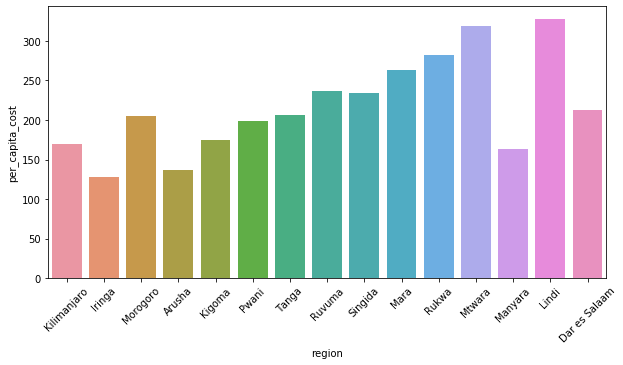

In [45]:
reg=df_fin.loc[0:14,'region']
pcp = df_fin.loc[0:14,'per_capita_cost']
plt.figure(figsize=(10,5))
plot_a = sns.barplot(x= reg, y= pcp)
loc, labels = plt.xticks();
plot_a.set_xticklabels(labels, rotation=45)

#plot_a.set_xticklabels(pcp.values)

[Text(0, 0, 'Kilimanjaro'),
 Text(0, 0, 'Iringa'),
 Text(0, 0, 'Morogoro'),
 Text(0, 0, 'Arusha'),
 Text(0, 0, 'Kigoma'),
 Text(0, 0, 'Pwani'),
 Text(0, 0, 'Tanga'),
 Text(0, 0, 'Ruvuma'),
 Text(0, 0, 'Singida'),
 Text(0, 0, 'Mara'),
 Text(0, 0, 'Rukwa'),
 Text(0, 0, 'Mtwara'),
 Text(0, 0, 'Manyara'),
 Text(0, 0, 'Lindi'),
 Text(0, 0, 'Dar es Salaam'),
 Text(0, 0, 'Mwanza'),
 Text(0, 0, 'Shinyanga')]

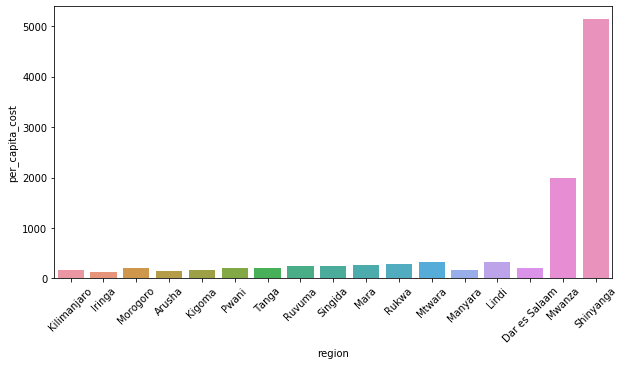

In [46]:
plt.figure(figsize=(10,5))
plot_a = sns.barplot(x= df_fin.region, y= df_fin.per_capita_cost)
loc, labels = plt.xticks()
plot_a.set_xticklabels(labels, rotation=45)

# 3.A. Feature Engineering and Modelling

## Start with a Simple and Quick model :


### Machine Learning Pipeline with  NUMERIC and Categorical FEATURES

![alt text](pipeline.png "Workflow of the developed ML pipeline")



In [47]:
## Importing libraries for model Pipeline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,precision_recall_fscore_support,f1_score
import time
from sklearn.dummy import DummyClassifier

In [48]:
X_temp = X.copy()
y_temp = y.copy()
X_train, X_test, y_train, y_test = train_test_split(X_temp,
                                                    y_temp,
                                                    test_size=0.2,
                                                    random_state =42)

In [49]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values =0, strategy ='mean')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy ='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown= 'ignore'))
    
])

ct = ColumnTransformer(remainder = 'drop',
                      transformers=[
                          ('numerical', num_pipe, num_feat),
                          ('categorical', cat_pipe, cat_feat)
                      ])

##Logistic Regression
model_1 = Pipeline([
    ('ct', ct),
    ('logreg_classifier', LogisticRegression(solver = 'lbfgs',multi_class='auto'))   
])


## Decision Tree
model_2 = Pipeline([
    ('ct', ct),
    ('DT_classifier', DecisionTreeClassifier())   
])

## Random Forest
model_3 = Pipeline([
    ('ct', ct),
    ('RF_classifier', RandomForestClassifier(n_jobs = -1))
    
])

## SVM Classifier
model_4 = Pipeline([
    ('ct', ct),
    ('SVM_classifier', LinearSVC(random_state=0))
    
])


## SGD_classifier
model_5 = Pipeline([
    ('ct', ct),
    ('SGD_classifier', SGDClassifier(loss='log',random_state=0))
    
])



In [50]:
## Time elapsed  in seconds in execution of a model
time_elapsed = []
accuracy = []
f1_acc =[]

#for model in [model_1, model_5]:
for model in [model_1,model_2,model_3, model_4, model_5]:

    
    print('MODEL_NAME: ', model.steps[1][0])
          
    start_time = time.time()
    model.fit(X_train,np.array(y_train).ravel())
    
    time_el = (time.time() - start_time) 
    time_elapsed.append(time_el)
    print("--- %s seconds ---" % time_el)
    print('acc_with_train_data using: ', model.steps[1][0], model.score(X_train, y_train))
          
    y_test_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    accuracy.append(acc)
    print('classification_accuracy with: ',model.steps[1][0], acc)
    
    rp= f1_score(y_test, y_test_pred, average= None)
    f1_acc.append(rp)
    
    report = classification_report(y_test, y_test_pred)
    print(model.steps[1][0])
    print(report)
    
    
    conf_mat = confusion_matrix(y_test, y_test_pred)
    print(model.steps[1][0])
    print(conf_mat)
    

MODEL_NAME:  logreg_classifier


C:\Users\rinkideo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


--- 34.54545283317566 seconds ---
acc_with_train_data using:  logreg_classifier 0.8510311447811448
classification_accuracy with:  logreg_classifier 0.7874579124579124
logreg_classifier
                         precision    recall  f1-score   support

             functional       0.79      0.88      0.83      6457
functional needs repair       0.54      0.32      0.40       851
         non functional       0.82      0.74      0.78      4572

               accuracy                           0.79     11880
              macro avg       0.71      0.65      0.67     11880
           weighted avg       0.78      0.79      0.78     11880

logreg_classifier
[[5690  155  612]
 [ 439  273  139]
 [1100   80 3392]]
MODEL_NAME:  DT_classifier
--- 50.82828664779663 seconds ---
acc_with_train_data using:  DT_classifier 0.9999789562289563
classification_accuracy with:  DT_classifier 0.7845959595959596
DT_classifier
                         precision    recall  f1-score   support

             funct

C:\Users\rinkideo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--- 60.56857967376709 seconds ---
acc_with_train_data using:  SVM_classifier 0.9813762626262627
classification_accuracy with:  SVM_classifier 0.7808922558922559
SVM_classifier
                         precision    recall  f1-score   support

             functional       0.79      0.86      0.82      6457
functional needs repair       0.48      0.31      0.38       851
         non functional       0.80      0.76      0.78      4572

               accuracy                           0.78     11880
              macro avg       0.69      0.64      0.66     11880
           weighted avg       0.77      0.78      0.77     11880

SVM_classifier
[[5530  195  732]
 [ 444  264  143]
 [ 999   90 3483]]
MODEL_NAME:  SGD_classifier
--- 23.64477014541626 seconds ---
acc_with_train_data using:  SGD_classifier 0.8238846801346801
classification_accuracy with:  SGD_classifier 0.787962962962963
SGD_classifier
                         precision    recall  f1-score   support

             functional    

In [51]:
### Data Distribution
y_test['status_group'].value_counts()/y_test.shape[0]*100

functional                 54.351852
non functional             38.484848
functional needs repair     7.163300
Name: status_group, dtype: float64

In [52]:
### Null Accuracy
y_test['status_group'].value_counts().head(1)/y_test.shape[0]

functional    0.543519
Name: status_group, dtype: float64

## Overall Accuracy

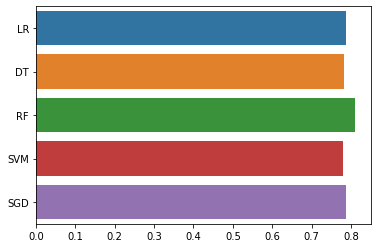

In [71]:
models =  ['LR','DT', 'RF', 'SVM', 'SGD']
acc1 = accuracy

sns.barplot(x= accuracy, y= models, orient = 'h' )

Text(0.5, 0, 'Execution Time')

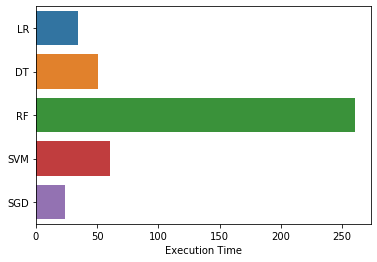

In [56]:
models =  ['LR','DT', 'RF', 'SVM', 'SGD']
time_l = time_elapsed

sns.barplot(x= time_l, y= models, orient = 'h', label= time_l )
plt.xlabel('Execution Time')


Classification accuracy is the easiest classification metric to understand But, it does not tell  the underlying distribution of response values. And, it does not tell  what "types" of errors our classifier is making.We examine by calculating the null accuracy.

Confusion matrix gives  a more complete picture of how our classifier is performing. Also allows  to compute various classification metrics

## F1 Score of Minority class

In [59]:
f1_acc

[array([0.83150665, 0.401766  , 0.778428  ]),
 array([0.82756024, 0.4       , 0.78789238]),
 array([0.85083523, 0.43036109, 0.81143635]),
 array([0.82352941, 0.37714286, 0.78006719]),
 array([0.83490163, 0.31578947, 0.77397579])]

Text(0.5, 1.0, 'F1_score forpumps need repair')

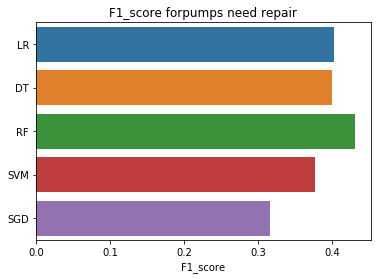

In [60]:
models =  ['LR','DT', 'RF', 'SVM', 'SGD']

class_func = []
class_rep = []
class_nonfunc = []
for i in range (0,5):
    class_func.append(f1_acc[i][0])
    class_rep.append(f1_acc[i][1])
    class_nonfunc.append(f1_acc[i][2])


sns.barplot(x= class_rep, y= models, orient = 'h' )    

plt.xlabel('F1_score')

plt.title('F1_score forpumps need repair')

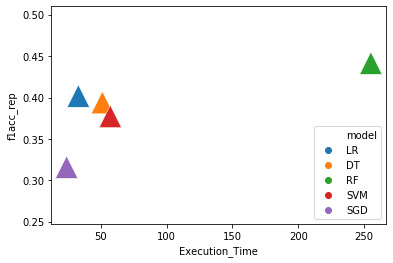

In [144]:

df = pd.DataFrame({
'Execution_Time': time_l,
'f1acc_rep': class_rep,
'f1acc_func': class_func,
'f1non_func':class_nonfunc,
'model': ['LR','DT', 'RF', 'SVM', 'SGD']
})
 
sns.scatterplot(data=df, x="Execution_Time", y="f1acc_rep", hue = 'model',
                marker = '^',s=500 ,linewidth=.5, edgecolor="white")



plt.title('F1_score vs Execution Time for pumps need repair')

### Cardinality Reduction

Unique values in some categorical columns such as funder, wpt_name, subvillage, etc. are large. Generally cardinality leads to more problems in tree based models. We will only retain the categories in a categorical column that has 1% or more appearances. The remaining categories in that column will be aggregated as Others. 

In [62]:
X.describe(include=['O']).T

,count,unique,top,freq
funder,55765,1897,Government Of Tanzania,9084
installer,55745,2145,DWE,17402
wpt_name,59400,37400,none,3563
basin,59400,9,Lake Victoria,10248
subvillage,59029,19287,Madukani,508
region,59400,21,Iringa,5294
region_code,59400,27,11,5300
district_code,59400,20,1,12203
lga,59400,125,Njombe,2503
ward,59400,2092,Igosi,307


In [63]:
df = X.copy()

def group_levels_in_categoricals(df, threshold=0.01, min_freq=0, max_freq=np.Inf):
    df0 = df.describe(include=['O']).T
    # reduced list is name of categorical columns
    reduced_list = df0[(df0.unique < max_freq) & (df0.unique > min_freq)].reset_index()['index'].tolist()
    
    #patterns will contain list of all categories of all categorical column whose occurance is more than threshold
    patterns = []
    other = []
    for col in reduced_list:
        df_normalized = df[col].value_counts(normalize=True).reset_index()
        df_normalized.columns = ['col_name', 'normalized_value']
        filt = df_normalized['normalized_value'] > threshold
        # norm_list contains all the categories in a categorical column whose occurance is more than threshold    
        norm_list = df_normalized[filt]['col_name'].tolist()
        pattern = norm_list
        patterns.append(norm_list)
        # selecting categories that are present less than threshold
        others_list = df_normalized[~filt]['col_name'].tolist()
        other.append(others_list)
        
        if pattern != []: 
            df[col] = df[col].replace({x:'Other' for x in others_list})
        else:
            df.drop(col, inplace=True, axis=1)
    return (df, patterns, reduced_list, other)

df, patterns, reduced_list, other = group_levels_in_categoricals(df)
# training set after transformation
df.describe(include=['O']).T

,count,unique,top,freq
funder,55765,20,Other,26939
installer,55745,12,Other,28748
wpt_name,59400,4,Other,53259
basin,59400,9,Lake Victoria,10248
region,59400,21,Iringa,5294
region_code,59400,23,11,5300
district_code,59400,12,1,12203
lga,59400,35,Other,28835
public_meeting,56066,2,True,51011
recorded_by,59400,1,GeoData Consultants Ltd,59400


In [64]:
## Splitting the transformed dataset to train and test data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df,
                                                    y_temp,
                                                    test_size=0.2,
                                                    random_state =42)

In [65]:
X_train_1.shape

(47520, 37)

In [66]:
# Numerical columns
num_feat1 = X_train_1.select_dtypes(include='number').columns.to_list()

# Categorical columns
cat_feat1 = X_train_1.select_dtypes(include='object').columns.to_list()


In [67]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values =0, strategy ='mean')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy ='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown= 'ignore'))
    
])

ct = ColumnTransformer(remainder = 'drop',
                      transformers=[
                          ('numerical', num_pipe, num_feat1),
                          ('categorical', cat_pipe, cat_feat1)
                      ])

##Logistic Regression
model_1 = Pipeline([
    ('ct', ct),
    ('logreg_classifier', LogisticRegression(solver = 'lbfgs',multi_class='auto'))   
])


## Decision Tree
model_2 = Pipeline([
    ('ct', ct),
    ('DT_classifier', DecisionTreeClassifier())   
])

## Random Forest
model_3 = Pipeline([
    ('ct', ct),
    ('RF_classifier', RandomForestClassifier(n_jobs = -1))
    
])

## SVM Classifier
model_4 = Pipeline([
    ('ct', ct),
    ('SVM_classifier', LinearSVC(random_state=0))
    
])


## SGD_classifier
model_5 = Pipeline([
    ('ct', ct),
    ('SGD_classifier', SGDClassifier(loss='log',random_state=0))
    
])



In [68]:
## Time elapsed  in seconds in execution of a model
time_elapsed1 = []
accuracy1 = []
f1_acc1= []


#for model in [model_1]
for model in [model_1, model_2, model_3, model_4,model_5]:

    
    print('MODEL_NAME: ', model.steps[1][0])
          
    start_time = time.time()
    model.fit(X_train_1, y_train_1)
    
    time_el = (time.time() - start_time) 
    time_elapsed1.append(time_el)
    print("--- %s seconds ---" % time_el)
    print('acc_with_train_data using: ', model.steps[1][0], model.score(X_train_1, y_train_1))
          
    y_test_pred_1 = model.predict(X_test_1)
    acc = accuracy_score(y_test_1, y_test_pred_1)
    accuracy1.append(acc)
    print('classification_accuracy with: ',model.steps[1][0], acc)
    
    rp1 = f1_score(y_test_1, y_test_pred_1, average=None)
    f1_acc1.append(rp1)
     
    
    report1 = classification_report(y_test_1, y_test_pred_1)
    print(model.steps[1][0])
    print(report1)
    
    conf_mat1 = confusion_matrix(y_test_1, y_test_pred_1)
    print(model.steps[1][0])
    print(conf_mat1)
    

MODEL_NAME:  logreg_classifier


C:\Users\rinkideo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rinkideo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


--- 29.20309281349182 seconds ---
acc_with_train_data using:  logreg_classifier 0.7511994949494949
classification_accuracy with:  logreg_classifier 0.7485690235690236
logreg_classifier
                         precision    recall  f1-score   support

             functional       0.73      0.89      0.81      6457
functional needs repair       0.56      0.12      0.19       851
         non functional       0.79      0.66      0.72      4572

               accuracy                           0.75     11880
              macro avg       0.69      0.56      0.57     11880
           weighted avg       0.74      0.75      0.73     11880

logreg_classifier
[[5770   50  637]
 [ 587   99  165]
 [1520   28 3024]]
MODEL_NAME:  DT_classifier
--- 31.310118913650513 seconds ---
acc_with_train_data using:  DT_classifier 0.9969276094276094
classification_accuracy with:  DT_classifier 0.7579124579124579
DT_classifier
                         precision    recall  f1-score   support

             func

C:\Users\rinkideo\Anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


--- 85.98938846588135 seconds ---
acc_with_train_data using:  RF_classifier 0.9968223905723905
classification_accuracy with:  RF_classifier 0.8053872053872054
RF_classifier
                         precision    recall  f1-score   support

             functional       0.81      0.87      0.84      6457
functional needs repair       0.51      0.37      0.43       851
         non functional       0.83      0.79      0.81      4572

               accuracy                           0.81     11880
              macro avg       0.72      0.68      0.69     11880
           weighted avg       0.80      0.81      0.80     11880

RF_classifier
[[5645  205  607]
 [ 424  311  116]
 [ 865   95 3612]]
MODEL_NAME:  SVM_classifier


C:\Users\rinkideo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rinkideo\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--- 61.31123185157776 seconds ---
acc_with_train_data using:  SVM_classifier 0.7504419191919192
classification_accuracy with:  SVM_classifier 0.7475589225589225
SVM_classifier
                         precision    recall  f1-score   support

             functional       0.72      0.91      0.81      6457
functional needs repair       0.58      0.08      0.14       851
         non functional       0.80      0.64      0.72      4572

               accuracy                           0.75     11880
              macro avg       0.70      0.54      0.55     11880
           weighted avg       0.74      0.75      0.72     11880

SVM_classifier
[[5869   30  558]
 [ 623   69  159]
 [1609   20 2943]]
MODEL_NAME:  SGD_classifier


C:\Users\rinkideo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- 21.72126340866089 seconds ---
acc_with_train_data using:  SGD_classifier 0.7494107744107744
classification_accuracy with:  SGD_classifier 0.7477272727272727
SGD_classifier
                         precision    recall  f1-score   support

             functional       0.74      0.88      0.80      6457
functional needs repair       0.55      0.10      0.18       851
         non functional       0.78      0.68      0.72      4572

               accuracy                           0.75     11880
              macro avg       0.69      0.55      0.57     11880
           weighted avg       0.74      0.75      0.73     11880

SGD_classifier
[[5690   52  715]
 [ 580   89  182]
 [1448   20 3104]]


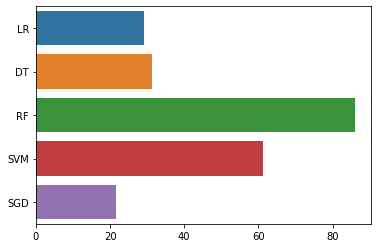

In [69]:
models =  ['LR','DT', 'RF', 'SVM', 'SGD']
time_l1 = time_elapsed1

sns.barplot(x= time_l1, y= models, orient = 'h', label= time_l1 )

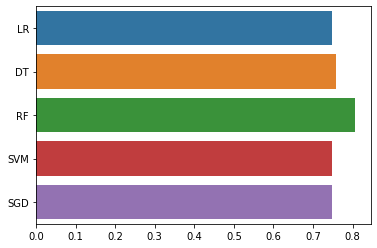

In [70]:
acc11 = accuracy1
models =  ['LR','DT', 'RF', 'SVM', 'SGD']

sns.barplot(x= acc11, y= models, orient = 'h' )

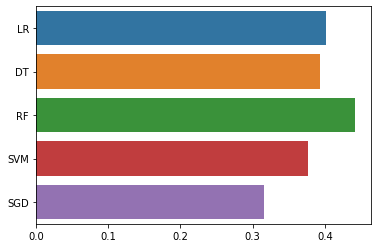

In [109]:
models =  ['LR','DT', 'RF', 'SVM', 'SGD']

class_func1 = []
class_rep1 = []
class_nonfunc1 = []
for i in range (0,5):
    class_func1.append(f1_acc1[i][0])
    class_rep1.append(f1_acc1[i][1])
    class_nonfunc1.append(f1_acc1[i][2])


sns.barplot(x= class_rep, y= models, orient = 'h' )    


In [ ]:
sns.scatterplot(x= time_l1, y=  class_rep1, hue= models, marker = '^', s=500 ,linewidth=.5, edgecolor="white")
plt.title('Accuracy vs Execution Time')
# Set x-axis label
plt.xlabel('Execution Time')
# Set y-axis label
plt.ylabel('Accuracy')

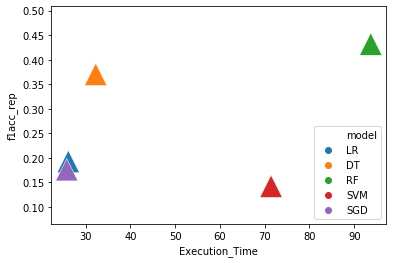

In [142]:
# Create dataframe
df = pd.DataFrame({
'Execution_Time': time_l1,
'f1acc_rep': class_rep1,
'f1acc_func': class_func1,
'f1non_func':class_nonfunc1,
'model': ['LR','DT', 'RF', 'SVM', 'SGD']
})
 
sns.scatterplot(data=df, x="Execution_Time", y="f1acc_rep", hue = 'model',
                marker = '^',s=500 ,linewidth=.5, edgecolor="white")


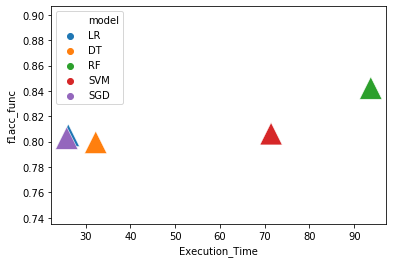

In [143]:
sns.scatterplot(data=df, x="Execution_Time", y="f1acc_func", hue = 'model',
                marker = '^',s=500 ,linewidth=.5, edgecolor="white")

In [112]:
f1_acc1

[array([0.80507883, 0.192607  , 0.72017147]),
 array([0.79953162, 0.37020316, 0.76618   ]),
 array([0.84234133, 0.43195667, 0.81091399]),
 array([0.80629207, 0.14226804, 0.71501458]),
 array([0.80282187, 0.17588933, 0.72413391])]

### Let's try a Random Forest with Grid Search cross validation

In [555]:
rfc_params = {'n_estimators':[2,5,10,20,50,75,150],
              'criterion':['gini', 'entropy'],
              'max_depth':[2,5,10,20,50,None],
              'min_samples_split':[2,5,10,20]}

model_new = Pipeline([
    ('ct', ct),
    ('scale', StandardScaler(with_mean=False)),
    ('classifier', GridSearchCV(RandomForestClassifier(), 
                        rfc_params, 
                        cv=5, 
                        scoring='accuracy'))
])

In [ ]:
model =model_new
   
print('MODEL_NAME: ', model.steps[1][0])
      
start_time = time.time()
model.fit(X_train_new1, y_train_new1)

time_el = (time.time() - start_time) 
print(time_el)
print('acc_with_train_data using: ', model.steps[1][0], model.score(X_train_new1, y_train_new1))
      
y_test_pred_new = model.predict(X_test_new1)
acc2 = accuracy_score(y_test_new1, y_test_pred_new1)
print('classification_accuracy with: ',model.steps[1][0], acc2)

report2 = classification_report(y_test_new1, y_test_pred_new1)
print(model.steps[1][0])
print(report2)

conf_mat2 = confusion_matrix(y_test_new1, y_test_pred_new1)
print(model.steps[1][0])
print(conf_mat2)


score 0.8217

### Overall Conclusion:

1) For the posed problem, classes are imbalanced and hence classification rate does not represent the underlying error distribution in each class. So, we need to assess accuracy in terms of f1_score that includes the precision and recall values.

2) The success of model should be assessed not only in terms of accuracy but also other factors related to social cause or business value. In this case the success should also be measured in terms of no. of people who will be benefitted by fixing the water pump.

2)In case of limited fund or time where fixing all the water pumps is not possible, it will be important for the government to know which water pumps are crucial to help mitigate the water crisis concerns.

### Next Step

1)To address the minority class problem SMOTE Synthetic Minority Over-sampling Technique stacked with Random Forest is expected to give better result